<hr>

# Matute moris 🍑

# Introducción Scipy 

Scipy es una libreria en general para aplicar **métodos numéricos**. <br>
Hace click  en el link para visitar la página oficial: <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/index.html" >  scipy  </a>.

Vamos  a estar usando el módulo **stats** , el cual contiene varios objetos relacionados a estadística. 

## Introducción a la clases en stats

In [ ]:
# Importamos el módulo
from scipy import stats

In [ ]:
# Declaramos X como un objeto tipo Binomial, shift+tab para ver info extra
# establecemos los parámetros de la distribución 
X = stats.binom(n = 10,  p = 0.2) 

Hay en general varias funciones (métodos) asociados a cada tipo de variable aleatoria. 

In [ ]:
print(X.pmf(3))           # P(X = 3)
print(X.cdf(4))           # P(X <= 4)
print(X.mean())           # E[X]

In [ ]:
print(X.var())            # Var(X)
print(X.std())            # Desvío(X)

In [ ]:
print(X.rvs())            # Obetene un muestre aleatorio
print(X.rvs(10))          # 10 Muestreos Aleatorios

In [ ]:
# Esta bueno usar la función help() para obtener más info  :D, en general lo mismo que shift+tab
help(stats.binom)  

Pueden tambíen visitar la página oficial donde hay tambíen referencias <a href="https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats">scipy- documentacion</a> <br>
Una ventaja de la función help es que tenes información con acceso directo, no tenes que andar buscando. 

### Variables Discretas

#### Poisson

In [ ]:
from scipy import stats
Y = stats.poisson(2)  # Declaro a Y como una VA con distribución poisson
print(Y.pmf(3))       # P(Y = 3)
print(Y.rvs())  # Muestra aleatoria

#### Geometrica

In [ ]:
X = stats.geom(0.75)  #Declaro a X como una VA con distribución Geometrica
print(X.pmf(3))       # P(X = 3)
print(X.rvs())        # Muestra aleatoria


### Variables Continuas 

#### Normal


In [ ]:
A = stats.norm(3, 4) # Declaro a  A como una variable Normal
print(A.pdf(4))       # f(3)
print(A.cdf(2))      #P(Y < 2)
print(A.rvs())      

#### Exponencial 

In [ ]:
from scipy import stats
B = stats.expon(4)    # Declaro B como una variable Aleatoria con Distribución exponencial
print(B.pdf(2))       # f(1)
print(B.cdf(4.6))       # F(2)
print(B.rvs())        # Muestra aleatoria

<hr>

# Inicia Vampiro 🦇 🧛‍♂️

## Distribuciones Muestrales

Cuando se toma muestas aleatorias simples, entonces el resultado de la distribución muestral es exactamente el mismo de la población 


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Binomial Probabilidad Teórica

A continuación presentamos un gráfico con la distribución teórica de una binomial con  <br>
n = 10 y p = 02.

Text(0, 0.5, 'probabilidad')

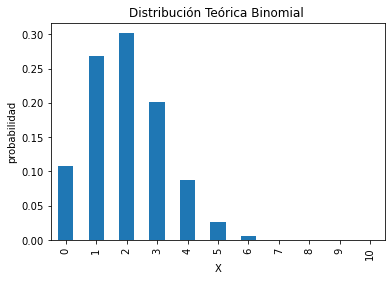

In [ ]:
X = stats.binom(n=10,p=0.2)

# valores para el gráfico
pmf_binomial = [X.pmf(i) for i in np.arange(11)]

# gráfico
df = pd.Series(pmf_binomial)
df.plot.bar()
plt.title("Distribución Teórica Binomial ");
plt.xlabel("X")
plt.ylabel("probabilidad")

### Distribución muestral Binomial

In [ ]:
X = stats.binom(10, 0.2) 
sample = X.rvs(size=10000) #hago un millon de muestras

In [ ]:
#Armo gráfico de la distribución muestral
df = pd.Series(sample)
count = df.value_counts().sort_index()
count.plot.bar()
plt.title("Distribución Muestral \n población Binomial ")

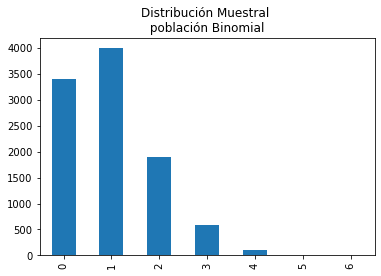

In [ ]:
# Aplico la versión general 
def plot_binomial(n=10,p=0.1, s=10000):
    X = stats.binom(n, p) # Declare X to be a binomial random variable
    sample = X.rvs(size=s)
    df = pd.DataFrame(sample)
    df.columns=["values"]
    count = df["values"].value_counts().sort_index()
    count.plot.bar()
    plt.title("Distribución Muestral \n población Binomial ")
    
plot_binomial()

Se observa que la distribución muestral es exactamnte la misma que la poblacional. <br>
**Intuición útil:** Entonces uno puede pensar a cada muestra como una VA con la misma distribución que la poblaciónal. 

### Función de Densidad Exponencial 

In [ ]:
X = stats.expon(3) # Declaro X como exponencial
sample = X.rvs(size=100000)

Text(0, 0.5, 'f(x)')

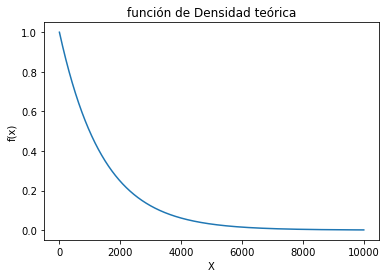

In [ ]:
# Armo el gráfico
f_expn = [X.pdf(i) for i in np.linspace(3,10,10000)]
df = pd.Series(f_expn)
df.plot()
plt.title("función de Densidad teórica")
plt.xlabel("X")
plt.ylabel("f(x)")

### Distribución muestral,  Población Exponencial

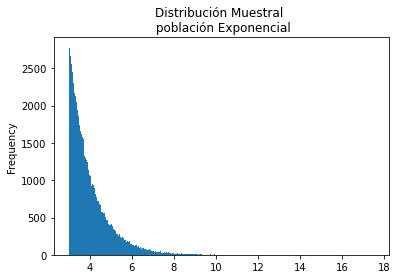

In [ ]:
def plot_expon(alpha=3,s=100000):
    X = stats.expon(alpha) # Declare X to be a binomial random variable
    sample = X.rvs(size=s)
    df = pd.DataFrame(sample)
    df.columns=["values"]
    count = df["values"]
    count.plot.hist(bins=500);
    plt.title("Distribución Muestral \n población Exponencial")

plot_expon()  

## Ley de Los grandes Números
En forma matemática dice:
$${\displaystyle {\begin{matrix}{}\\{\overline {X}}_{n}\,\to \,\mu \qquad {\textrm {for}}\qquad n\to \infty ,\\{}\end{matrix}}}$$
Es decir la media muetral tiende a la poblacional, a medida que n tiende a infinito. 

A continuación deducimos la media teórica de una binomial. 

In [ ]:
#defino los parámetros de una binomial
n= 10
p= 0.9

In [ ]:
#binomial
X = stats.binom(n, p)

In [ ]:
#formula de la media en binomial
mu =  n* p
print(mu)

9.0


Ahora queremos comprobar que la ley de los Grandes números se cumple. <br>
Vamos a tomar iteradas muestras y calcular la media.

In [ ]:
# diferentes tamaños de muestras
n = [10, 20 , 50 , 300]

#inicializamos lista vacía
medias_muestrales= []

In [ ]:
for i in n:
    resultado =  X.rvs(i).mean()
    medias_muestrales.append(resultado)

print(n, "\n") 
print(medias_muestrales)

[10, 20, 50, 300] 

[9.0, 9.15, 8.98, 9.03]


Ahora lo mismo con la exponencial 

In [ ]:
X = stats.expon(3)
X.mean()

4.0

In [ ]:
# diferentes tamaños de muestras
n = [10, 20 , 50 , 300, 100000]

#inicializamos lista vacía
medias_muestrales= []

for i in n:
    resultado =  X.rvs(i).mean()
    medias_muestrales.append(resultado)

print(n, "\n") 
print(medias_muestrales)


[10, 20, 50, 300, 100000] 

[3.69871498329647, 4.064830676811147, 3.8083630604391834, 4.001748366858043, 3.995626341161734]


## Teorema Central del Límite
En forma matemática:
$${\displaystyle \lim _{n\to \infty }\Pr \left[{\sqrt {n}}({\bar {X}}_{n}-\mu )\leq z\right]=\lim _{n\to \infty }\Pr \left[{\frac {{\sqrt {n}}({\bar {X}}_{n}-\mu )}{\sigma }}\leq {\frac {z}{\sigma }}\right]=\Phi \left({\frac {z}{\sigma }}\right),}$$

**Intuición:** basicamente dice que la *media muestral* sigue una *distribución normal* con media igual a la poblacional $\mu$, y desvío igual al desvío poblacional dividido raíz de n :  $\frac{\sigma}{\sqrt{n}}$. Es decir: 

$$ \bar{X} \sim N \Big(\mu,\;\frac{\sigma}{\sqrt{n}} \Big) $$

Ahora vamos a comprobar si este teorema se cumple jejeje

In [ ]:
#defino los parámetros de una binomial
n= 10
p= 0.9

#binomial
X = stats.binom(n, p)

#media y desvío
mu_p = X.mean()
desv_p = X.std()

print(mu_p, "\n", desv_p  )

9.0 
 0.9486832980505137


In [ ]:
import pandas as pd

# tamaño de la muestra
n= 100

#inicio lista vacía
medias_muestrales = []

for i in range(5000):
    sample = X.rvs(n)
    medias_muestrales.append(sample.mean())
    
mu_m = sum(medias_muestrales) / len(medias_muestrales)
mu_m

9.000216000000034

Text(0.5, 1.0, 'Distribución de la media muestral')

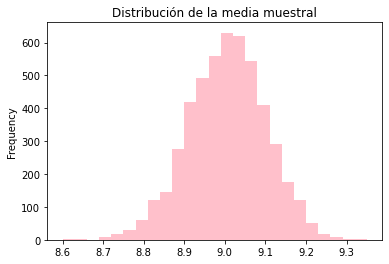

In [ ]:
df = pd.Series(medias_muestrales)
df.plot.hist(bins=25, color="pink")
plt.title("Distribución de la media muestral")

##  Mostrar que Z es normal 0, 1 para la media muestral

<hr>

# Tony  👨‍⚖️

# Intervalos de confianza 
